<a href="https://colab.research.google.com/github/Aerotycx/2022_ML_Earth_Env_Sci/blob/main/S3_2_Decision_Trees_Joel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 2: Training and Fine-Tuning a Decision Tree for the Moons Dataset

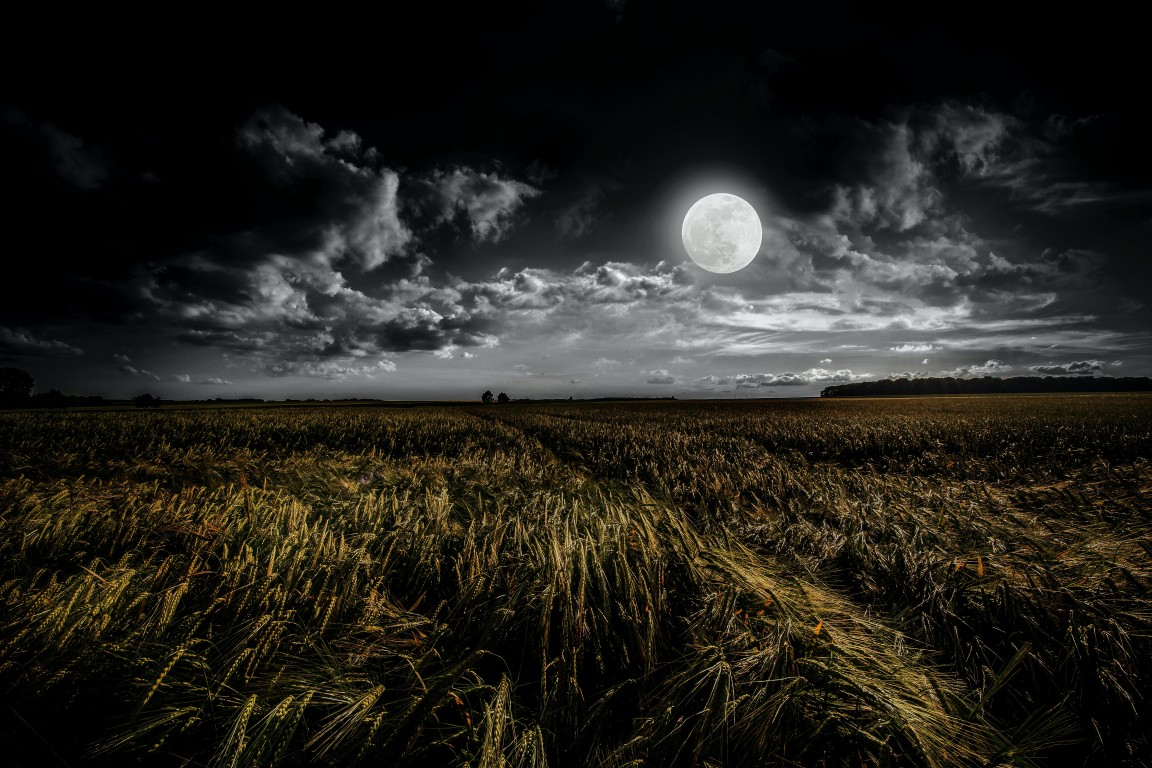

Can we grow a tree to predict the moon? 🌳 🌛

The goal of this exercise is to train and adjust the hyperparameters of a decision tree on a synthetic "moons" dataset. The dataset contains two interleaving half circles that we seek to separate via classification.

First, let's generate a moons dataset using [`make_moons`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html).

In [2]:
from sklearn.datasets import make_moons # Import function to make moons

In [3]:
# Make 10,000 samples with Gaussian noise that has a standard deviation of 0.4
X, y = make_moons(n_samples=10000, noise=0.4)

**Q1) Split the moons dataset into a training and a test set**

Hint 1: You may use the [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function of `scikit-learn`.

Hint 2: We recommend keeping 20% of the dataset for testing.

In [4]:
# Split the dataset into a training set and a test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Q2) Visualize the data, indicating which points belong to each half circle of the moon, and which points belong to the training and test sets**

Hint 1: In the moons dataset, `X` contains the 2D spatial coordinates of each sample, while `y` indicates which half circle of the moon the sample belongs to.

Hint 2: You may randomly subsample your data for visualization purposes. Alternatively, you can adjust the size and transparency of a [Matplotlib scatter plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) by varying the parameters `s` and `alpha`.

<a name="Q2"></a>

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0, 0.5, 'width [cm]')

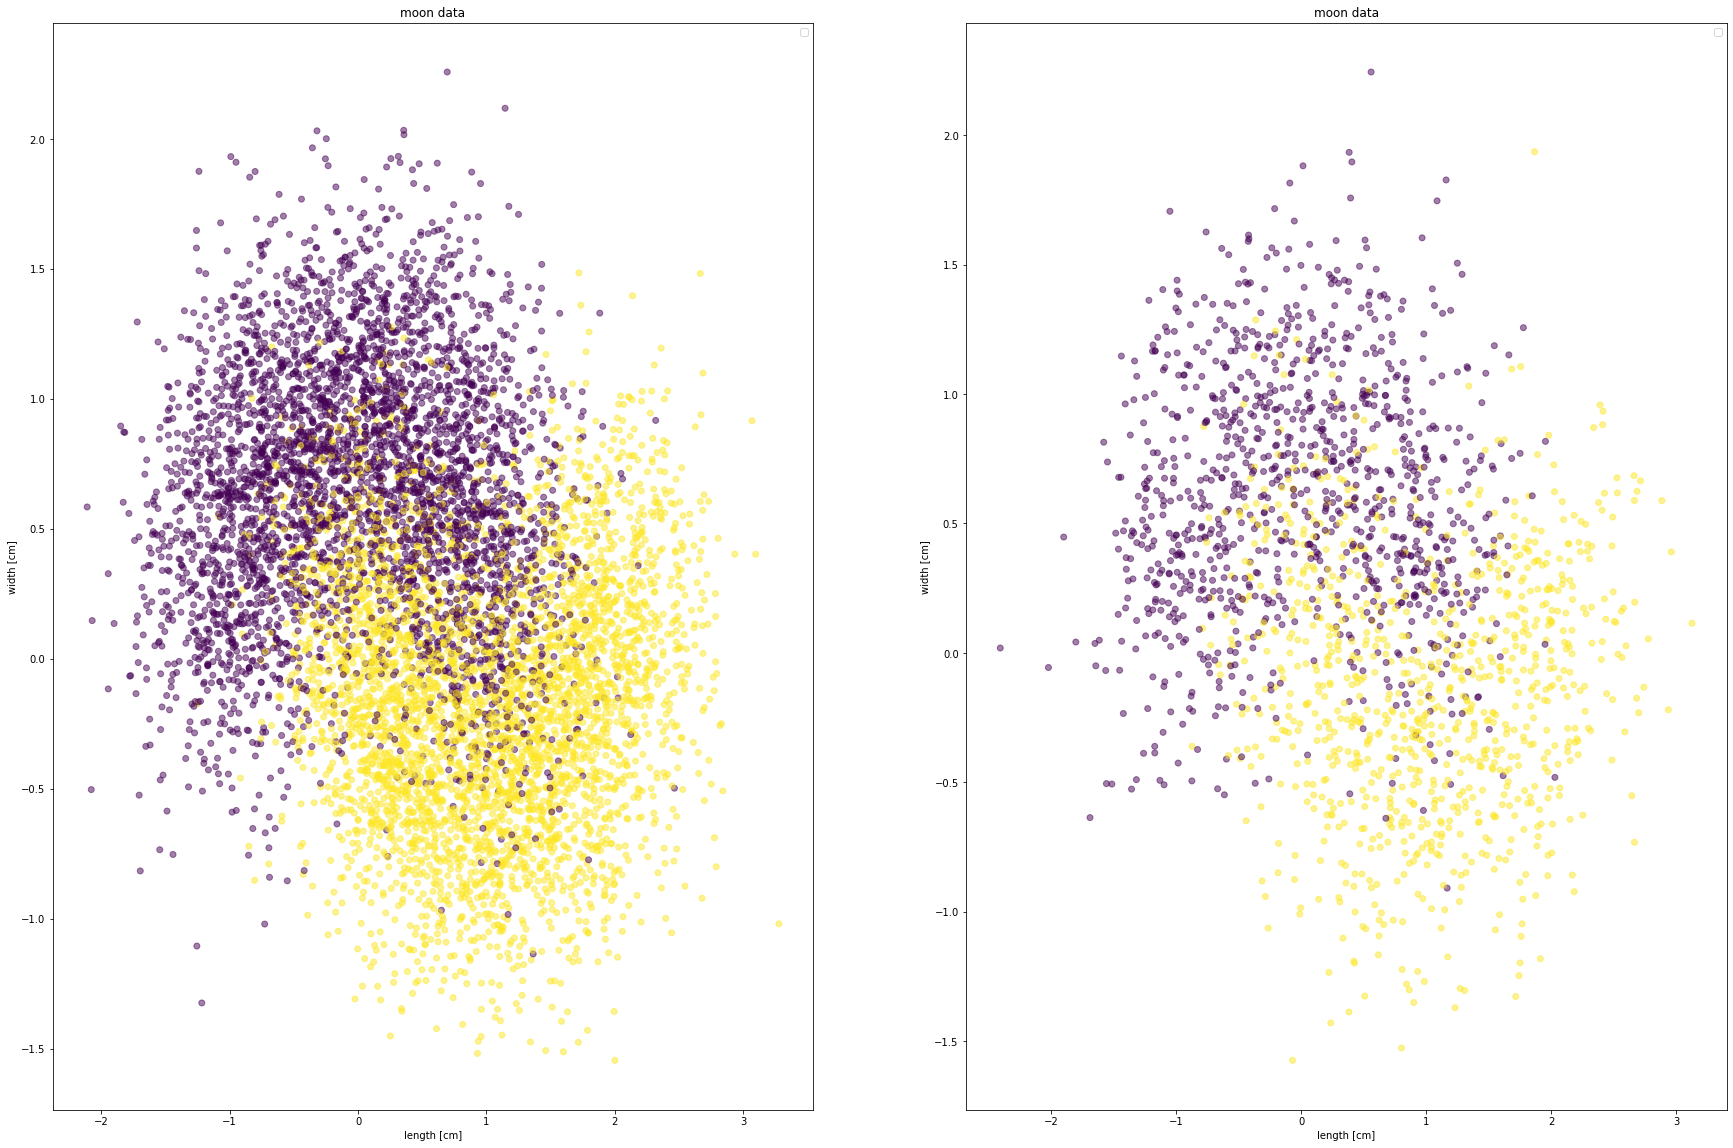

In [5]:
# Scatter the moon data and don't forget to add a legend to your figure
import matplotlib.pyplot as plt
fig,(plt1, plt2) = plt.subplots(1, 2,figsize=(30,20))
plt1.scatter(X_train[:,0],X_train[:,1], c=y_train, alpha=0.5)
plt2.scatter(X_test[:,0],X_test[:,1], c=y_test, alpha=0.5)
plt1.legend()
plt2.legend()
plt1.set_title('moon data')
plt1.set_xlabel("length [cm]")
plt1.set_ylabel("width [cm]")
plt2.set_title('moon data')
plt2.set_xlabel("length [cm]")
plt2.set_ylabel("width [cm]")

Do your data & training/test splits look reasonable?

**Q3) Conduct a hyperparameter search to find the two hyperparameters that lead to the best-performing decision tree**

Hint 1: You can conduct an exhaustive hyperparameter search over specified parameter values using the `GridSearchCV` class documented [at this link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). We recommend using cross-validation by setting the parameter `cv`.

Hint 2: If you choose to train a [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) object, we recommmend conducting the search over the `max_leaf_nodes` and `min_samples_split` hyperparameters. Consult the [`DecisionTreeClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) to decide which range to search over.

<a name="Q3"></a>

In [8]:
# Import the necessary classes and functions
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [11]:
# Conduct the grid search to find good hyperparameter values 
# for your decision tree
Dtree = DecisionTreeClassifier()
GSV = GridSearchCV(estimator=Dtree,
             param_grid={'max_leaf_nodes': [5,10,20,30,40,50], 'min_samples_split': [2,4,6,8,10]},cv=5)
GSV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_leaf_nodes': [5, 10, 20, 30, 40, 50],
                         'min_samples_split': [2, 4, 6, 8, 10]})

In [15]:
# Print the best values you found for the hyperparameters
# using the `best_estimator_` attribute of your grid search object
print('Best parameters:',GSV.best_estimator_)

Best parameters: DecisionTreeClassifier(max_leaf_nodes=5)


**Q4) Using the best hyperparameter values you found, train a decision tree over the entire training set and calculate its accuracy over both the training and test sets**

Hint 1: [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) has a method `predict` that automatically selects the best model found during the search.

Hint 2: Using the [accuracy classification score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html), you should find an accuracy of $\approx$85% on the test set.

In [16]:
# Make predictions on the training and test sets with your best model
predXtrain = GSV.predict(X_train)
predXtest = GSV.predict(X_test)

In [19]:
# Calculate the accuracy of the best model over the training and test sets
from sklearn.metrics import accuracy_score
print('Accuracy score train:',accuracy_score(predXtrain, y_train))
print('Accuracy score test:',accuracy_score(predXtest, y_test))

Accuracy score train: 0.86325
Accuracy score test: 0.844


**Q5) Visualize the errors made by your best model**

Hint: You may recycle the visualization scripts you developed in [Question 2](#Q2)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0, 0.5, 'width [cm]')

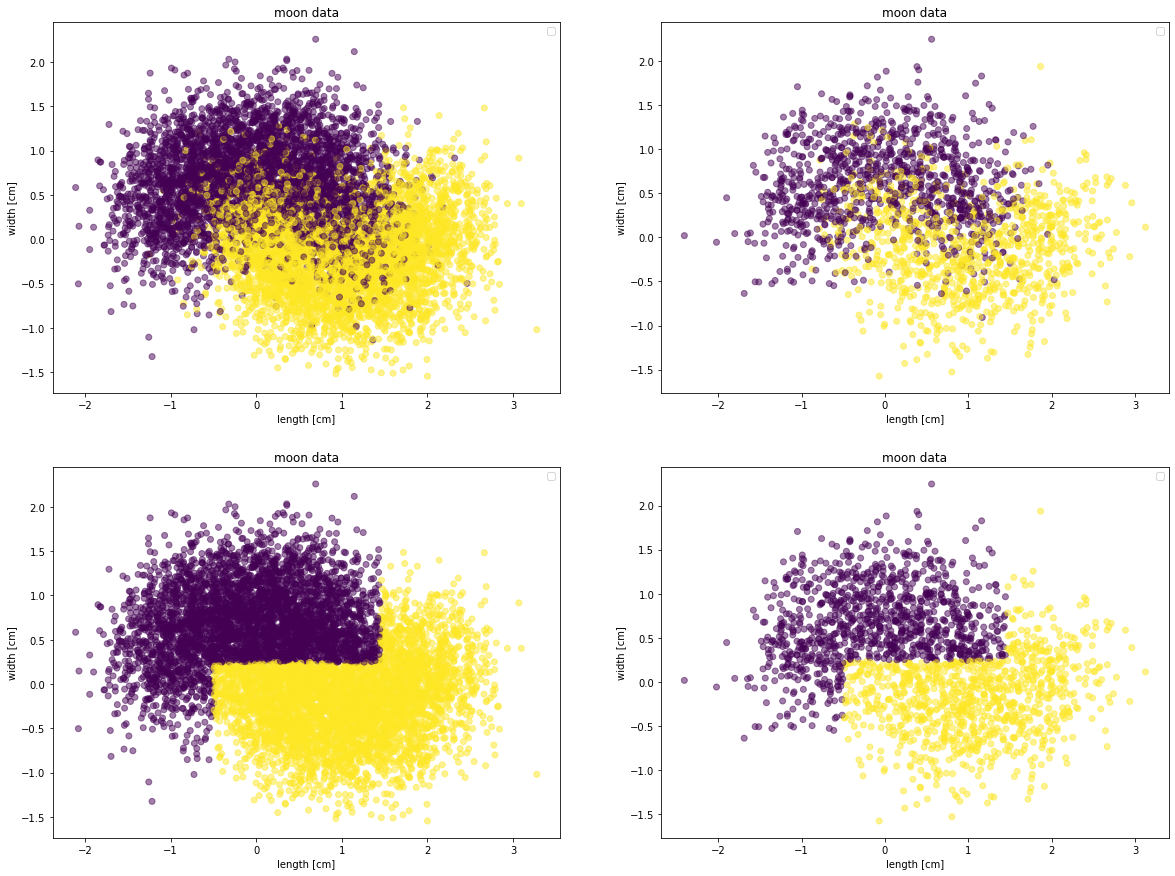

In [23]:
# Scatter points for which your best model made erroneous predictions
# and compare them to points for which your best models made correct predictions
fig,((plt1,plt2),(plt3,plt4)) = plt.subplots(2, 2,figsize=(20,15))
plt1.scatter(X_train[:,0],X_train[:,1], c=y_train, alpha=0.5)
plt2.scatter(X_test[:,0],X_test[:,1], c=y_test, alpha=0.5)
plt3.scatter(X_train[:,0],X_train[:,1], c=predXtrain, alpha=0.5)
plt4.scatter(X_test[:,0],X_test[:,1], c=predXtest, alpha=0.5)
plt1.legend()
plt2.legend()
plt3.legend()
plt4.legend()
plt1.set_title('moon data')
plt1.set_xlabel("length [cm]")
plt1.set_ylabel("width [cm]")
plt2.set_title('moon data')
plt2.set_xlabel("length [cm]")
plt2.set_ylabel("width [cm]")
plt3.set_title('moon data')
plt3.set_xlabel("length [cm]")
plt3.set_ylabel("width [cm]")
plt4.set_title('moon data')
plt4.set_xlabel("length [cm]")
plt4.set_ylabel("width [cm]")

Can you think of ways to improve your best model?

# Bonus Exercise 2: Upgrading the Decision Tree to a Random Forest

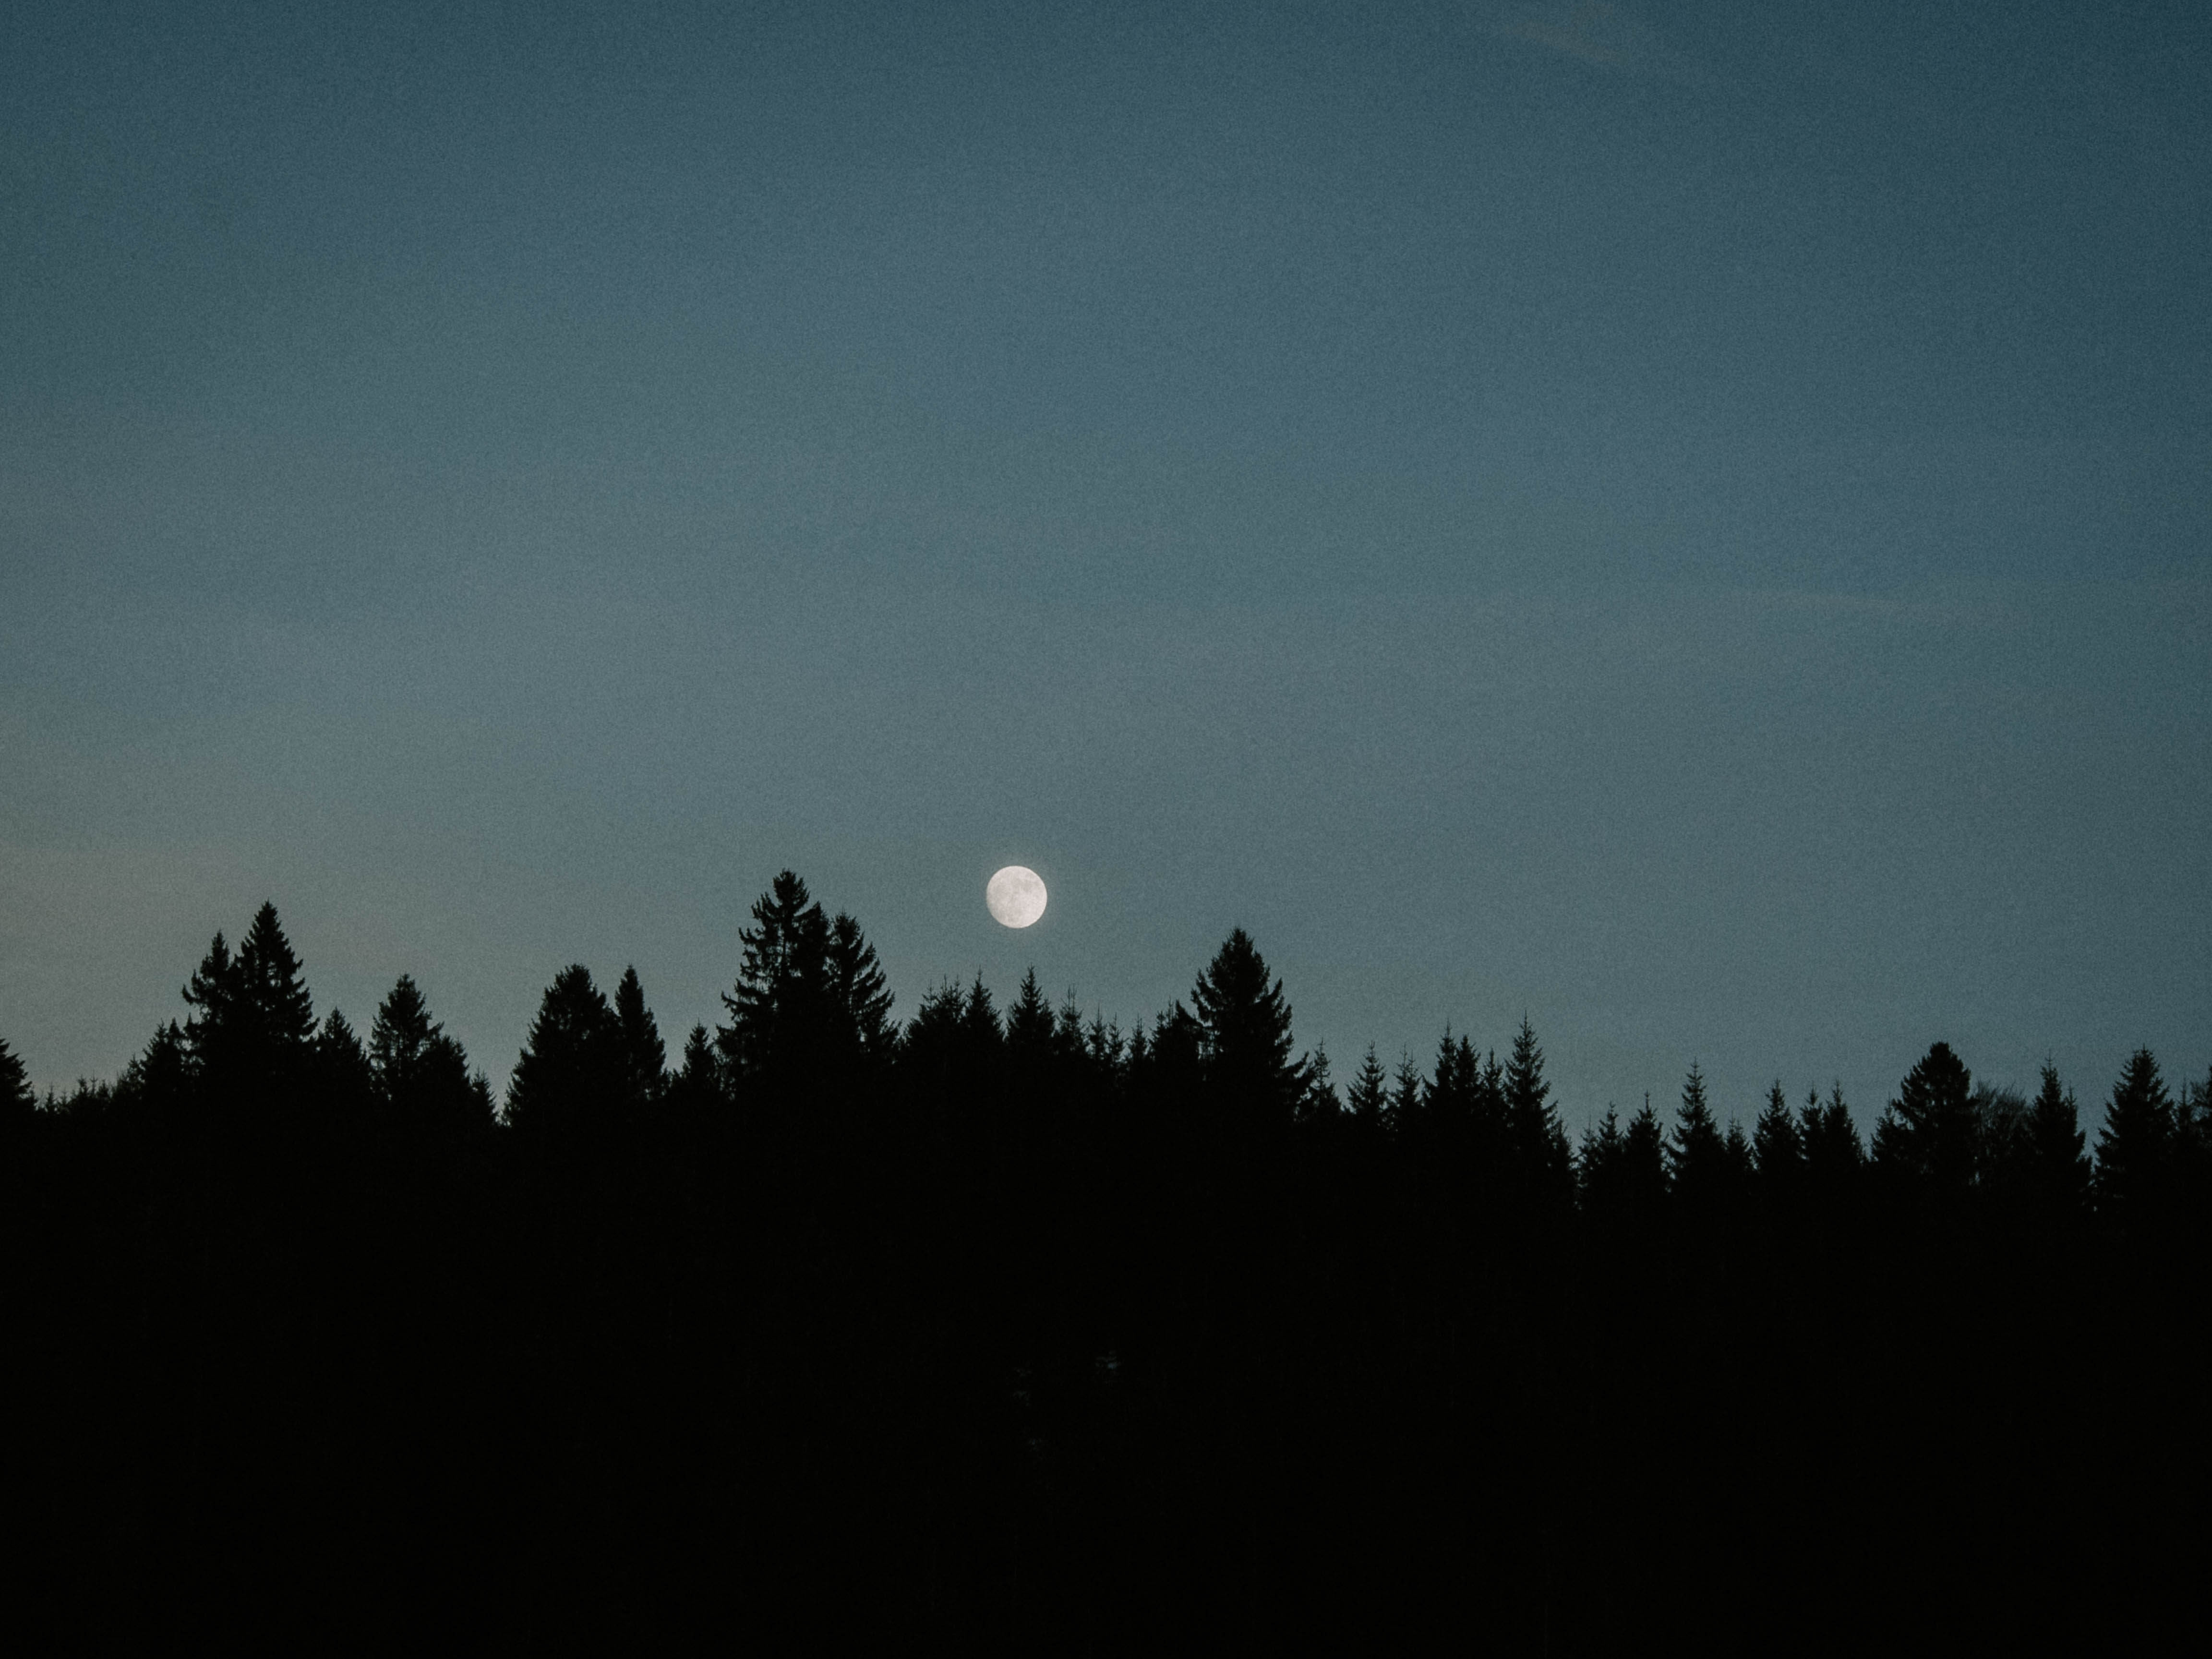

Is a full forest enough to predict the moon? 🌲

Building on the previous exercise, we would like to upgrade the decision tree to a random forest to make more accurate predictions on the `moons` dataset.

**Q1) Generate 1,000 subsets of the training set, each containing 100 instances selected randomly**

Hint: You may use `scikit-learn`'s random permutation cross-validator [ShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html) with the appropriate value of the  `n_splits` parameter.

In [ ]:
# Import and build the random permutation cross-validator

In [ ]:
# Generate 1,000 subsets of the training sets with 
# 100 randomly-selected instances

**Q2) Train one [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on each subset, using the best hyperparameter values found [above](#Q3)**

In [ ]:
# Train one decision tree per subset

**Q3) Evaluate each decision tree on the test set and visualize their accuracy**

Hint 1: You can quickly make histograms by using `Matplotlib.pyplot`'s [`hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) function

Hint 2: The mean accuracy of your decision trees should be approximately 80% because the decision trees are fitted on smaller sets. 

In [ ]:
# Train one decision tree on each subset

In [ ]:
# Calculate the mean accuracy

In [ ]:
# Visualize the distribution of accuracies

Now comes the magic ❇ 🌲 ❇ 

**Q4) Generate the predictions of the 1,000 decision trees over the test set, and only keep the most frequent prediction. This gives you *majority-vote predictions* over the test set**

Hint: You may use `Scipy`'s [`mode`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mode.html) function to calculate the most frequent prediction.

In [ ]:
# Generate the predictions of all trained decision trees over the test set

In [ ]:
# For each instance of the test set, calculate the majority-vote prediction

Congratulations!! 😃 You have created a random forest classifier 🌲 🌳 🌲

**Q5) Calculate the accuracy of your random forest classifier and visualize its performance**

Hint: Your accuracy should be approximately 1% higher than your best decision tree. 

In [ ]:
# Calculate the accuracy of your random forest classifier

In [ ]:
# Visualize its errors: Which points did the
# random forest classify correctly 
# when the decision tree was making an error?